In [40]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def bbox_calculator(image, txt_file_path):
        bboxes = []
        image_height, image_width, _ = image.shape
        with open(txt_file_path, 'r') as file:
                for line in file:
                # Parse the YOLO annotation (class_id, center_x, center_y, width, height)
                        data = line.strip().split()
                        center_x = float(data[1]) * image_width
                        center_y = float(data[2]) * image_height
                        width = float(data[3]) * image_width
                        height = float(data[4]) * image_height

                        # Convert YOLO format (center_x, center_y, w, h) to (x1, y1, x2, y2)
                        x1 = int(center_x - width / 2)
                        y1 = int(center_y - height / 2)
                        x2 = int(center_x + width / 2)
                        y2 = int(center_y + height / 2)

                        bboxes.append((x1, y1, x2, y2))
        return bboxes


def plot_bbox(images_folder_path, labels_folder_path):
    """This function shows the bounding box on the image

    Args:
        images_folder_path (str): images folder
        labels_folder_path (str): corresponding labels folder containing the .txt file as label in YOLO format
    """
    files = os.listdir(images_folder_path)
    images = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
    random_image = random.choice(images)
    random_image_path = os.path.join(images_folder_path, random_image)
    image = cv2.imread(random_image_path)
    txt_file = os.path.splitext(random_image)[0] + '.txt'
    txt_file_path = os.path.join(labels_folder_path, txt_file)
    bbox = bbox_calculator(image, txt_file_path)
    for (x1, y1, x2, y2) in bbox:
        color = (0, 0, 255) 
        thickness = 2
        cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness)
        plt.axis('off')
        plt.imshow(image)            
    return 

In [48]:
def bbox_plotter(image,box):
    image = np.asarray(image)
    for x1,y1,x2,y2 in box:
        color = (0,255,0)
        thickness = 2
        cv2.rectangle(image,(x1,y1),(x2,y2),color,thickness)
        plt.axis('off')
        plt.imshow(image)
    return

In [49]:
img_dir = '/Users/nithin/Desktop/ACADEMICS/CAMZ_Proj/CAMZ_PROJ/data/processed/Images'
label_dir = '/Users/nithin/Desktop/ACADEMICS/CAMZ_Proj/CAMZ_PROJ/data/processed/Labels'

[[325, 459, 464, 546]]


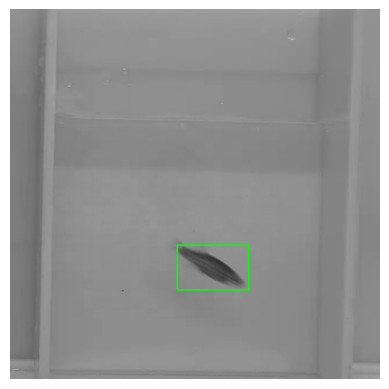

In [52]:
files = os.listdir(img_dir)
images = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
random_image = random.choice(images)
random_image_path = os.path.join(img_dir, random_image)

image = cv2.imread(random_image_path)

txt_file = os.path.splitext(random_image)[0] + '.txt'
txt_file_path = os.path.join(label_dir, txt_file)

bbox = bbox_calculator(image, txt_file_path)
bbox = [[x for x in bbox[0]]]
print(bbox)

bbox_plotter(image,bbox)